In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv(("./NYPD_Arrest_Data__Year_to_Date__20241023.csv"))
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [7]:
(df[df['OFNS_DESC'].isin(['MISCELLANEOUS PENAL LAW'])]['PD_DESC'].value_counts().head(5))


PD_DESC
PUBLIC ADMINISTRATION,UNCLASSI    7489
RECKLESS ENDANGERMENT 1           1384
FORGERY-ILLEGAL POSSESSION,VEH     688
CRIMINAL CONTEMPT 1                619
BRIBERY,PUBLIC ADMINISTRATION      469
Name: count, dtype: int64

In [17]:
dfp = df[df['OFNS_DESC'].isin(['MISCELLANEOUS PENAL LAW']) ]
dfp = dfp.loc[ (dfp['PD_DESC'] =='PUBLIC ADMINISTRATION,UNCLASSI')
|(dfp['PD_DESC'] =='FORGERY-ILLEGAL POSSESSION,VEH')
|(dfp['PD_DESC'] =='CRIMINAL CONTEMPT 1')
|(dfp['PD_DESC'] =='BRIBERY,PUBLIC ADMINISTRATION')
|(dfp['PD_DESC'] =='RECKLESS ENDANGERMENT 1')
 ]

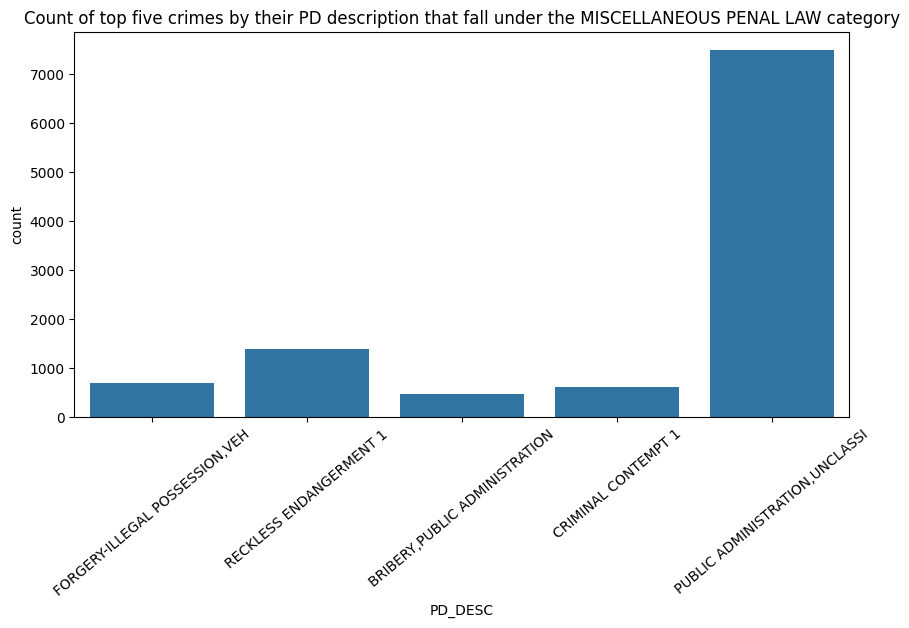

In [21]:
plt.rcParams["figure.figsize"] = (10,5)

sns.countplot(x='PD_DESC', data=dfp
)
plt.title('Count of top five crimes by their PD description that fall under the MISCELLANEOUS PENAL LAW category')
plt.xticks(rotation=40)
plt.show()